In [29]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [31]:
# Import the Fashion MNIST dataset.
fashion_mnist = keras.datasets.fashion_mnist

# Load_data returns NumPy arrays.
# The images are 28x28 NumPy arrays.
# The labels are an array of integers, ranging from 0 to 9. 
# These correspond to the class of clothing the image represents:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
# There are 60,000 images in the training set, with each image represented as 28 x 28 pixels.
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
print(len(train_labels))
print(len(test_labels))

60000
10000


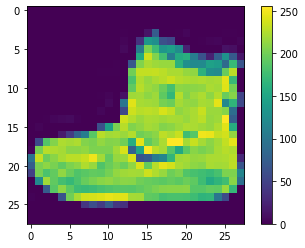

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

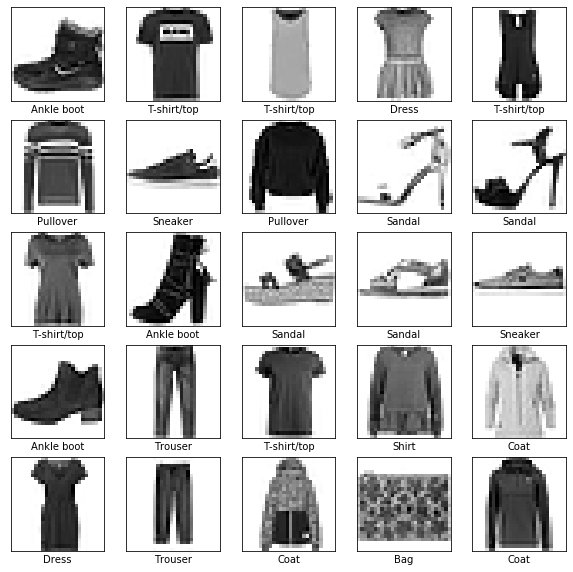

In [35]:
# We scale these values to a range of 0 to 1 before feeding to the neural network model. 
# For this, we divide the values by 255. 
# It's important that the training set and the testing set are preprocessed in the same way.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

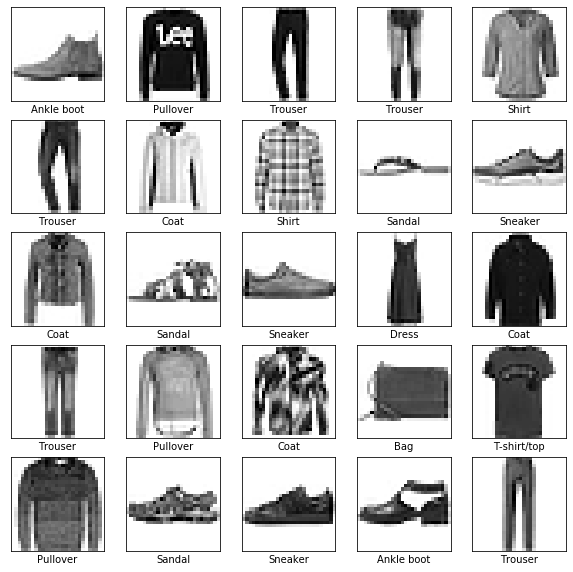

In [37]:
# Display the first 25 images from the testing set and display the class name below each image.
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [49]:
# The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.
# The first Dense layer has 128 nodes (or neurons).
# The second Dense layer is a 10-node softmax layer, this returns an array of 10 probability scores that sum to 1.
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [50]:
# Loss function: This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
# Optimizer: This is how the model is updated based on the data it sees and its loss function.
# Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# 1 - Feed the training data to the model—in this example, the train_images and train_labels arrays.
# 2 - The model learns to associate images and labels.
# 3 - We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.5071 - acc: 0.8208
Epoch 2/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3755 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3379 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3150 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2960 - acc: 0.8908


In [52]:
# Compare how the model performs on the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset.

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3447 - acc: 0.8742
Test accuracy: 0.8742
Test loss: 0.3447199662208557


In [61]:
# With the model trained, we can use it to make predictions about some images.
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing.
# So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct.
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

[8.2223196e-06 7.5786065e-06 2.3880040e-07 2.6250279e-06 2.0454481e-06
 7.4648946e-03 1.9155461e-05 4.1543102e-01 4.3302681e-04 5.7663119e-01]
9
Ankle boot


In [62]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

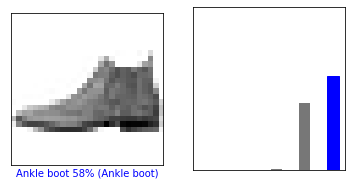

In [70]:
# Let's look at the 0th image, predictions, and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

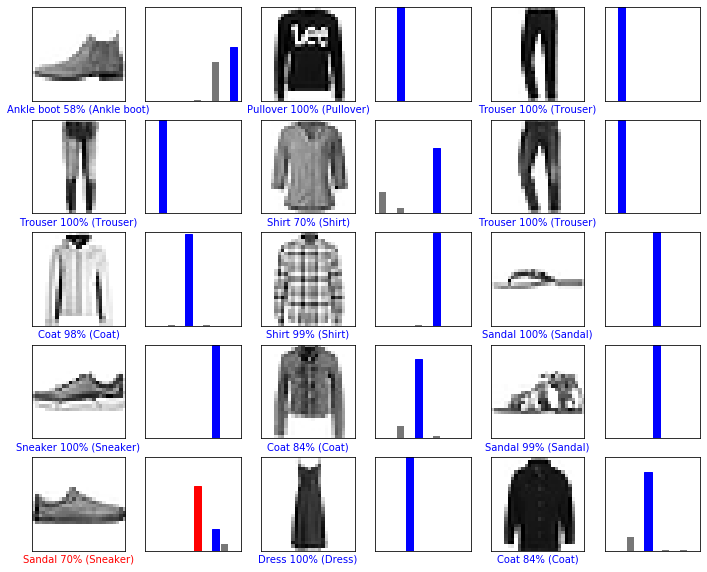

In [72]:
# Let's plot several images with their predictions.
# Correct prediction labels are blue and incorrect prediction labels are red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [78]:
# Finally, use the trained model to make a prediction about a single image.
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

(1, 28, 28)
[[8.2223050e-06 7.5786079e-06 2.3880000e-07 2.6250284e-06 2.0454506e-06
  7.4648960e-03 1.9155428e-05 4.1543090e-01 4.3302646e-04 5.7663131e-01]]
9
Ankle boot


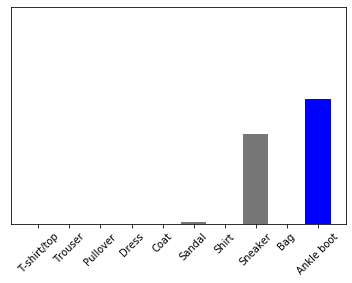

In [79]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)